In [1]:
import tensorflow as tf
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
X_train = np.loadtxt("C:\\Users\\PAWAN\\Deep Learning (CNN)\\Datasets\\input.csv",delimiter=",")
X_test = np.loadtxt("C:\\Users\\PAWAN\\Deep Learning (CNN)\\Datasets\\input_test.csv",delimiter=",")
y_train = np.loadtxt("C:\\Users\\PAWAN\\Deep Learning (CNN)\\Datasets\\labels.csv",delimiter=",")
y_test = np.loadtxt("C:\\Users\\PAWAN\\Deep Learning (CNN)\\Datasets\\labels_test.csv",delimiter=",")

In [3]:
X_train.shape

(2000, 30000)

In [4]:
X_train = X_train.reshape(len(X_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [5]:
X_train.shape

(2000, 100, 100, 3)

### Normalization

In [6]:
X_train= X_train/255.0
X_test= X_test/255.0

In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2000, 100, 100, 3), (400, 100, 100, 3), (2000, 1), (400, 1))

In [8]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

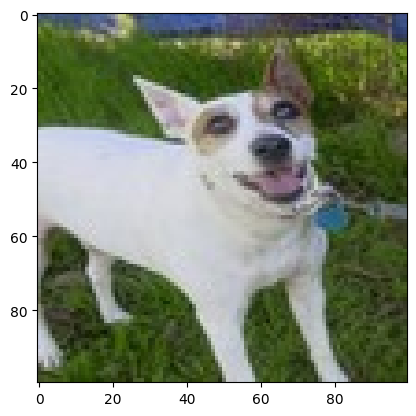

In [9]:
n=random.randint(0,len(y_test))
plt.imshow(X_train[n,:])

# Model Building


In [10]:
model = Sequential([
    
    Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)),
   #Conv2D(no_of_filters,filter_size,activation="relu",input_shape=(100,100,3))
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation="relu"),
    Dense(1,activation="sigmoid")
])

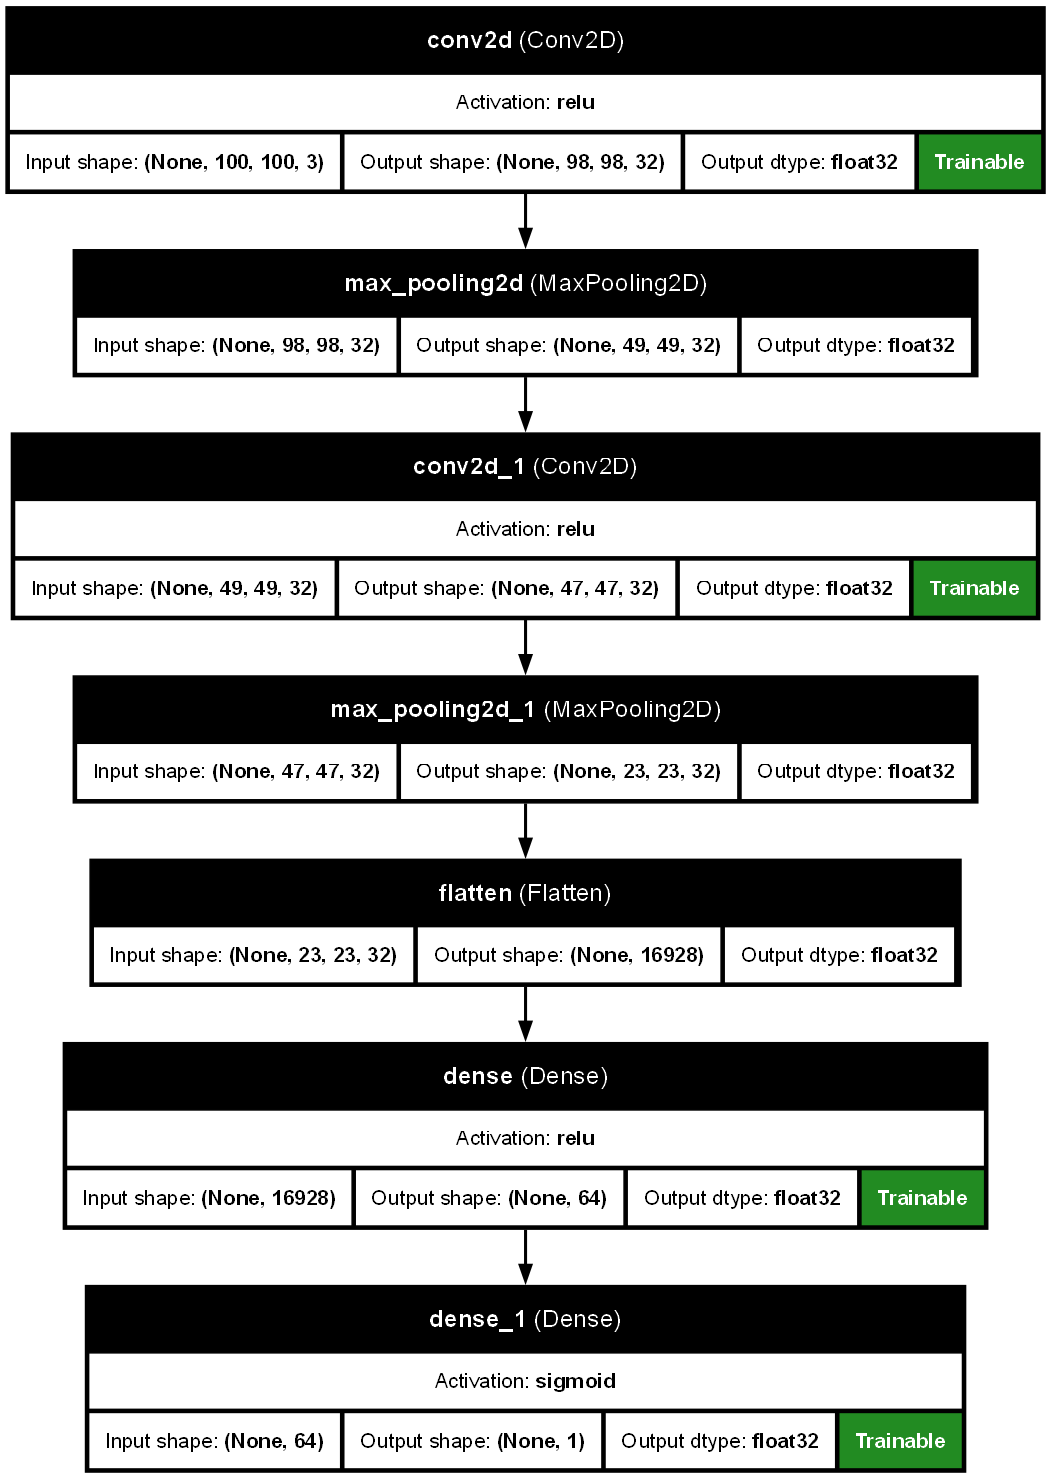

In [11]:
keras.utils.plot_model(model,to_file='C:\\Users\\PAWAN\\Gitdemo\\Simple-Classification-Cat-Dog-Model-using-DL-CNN-\\Model Architecture\\model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=110,
    show_layer_activations=True,
    show_trainable=True)

In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.5183 - loss: 0.7647
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.5841 - loss: 0.6831
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.7117 - loss: 0.6019
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.7760 - loss: 0.4898
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.7911 - loss: 0.4445
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.8474 - loss: 0.3471
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.9012 - loss: 0.2381
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.9372 - loss: 0.1779
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.9624 - loss: 0.1179
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9818 - loss: 0.0639


In [14]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5994 - loss: 1.6889


[1.2658641338348389, 0.6725000143051147]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
0.98419803
Prediction:Cat


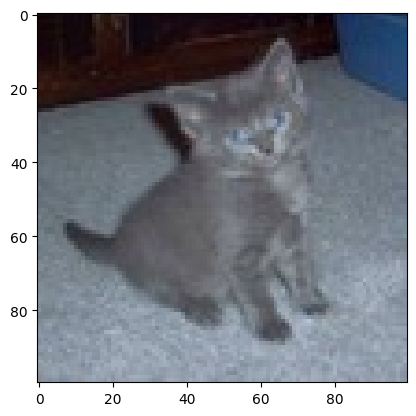

In [25]:
n= random.randint(0,len(y_test))
plt.imshow(X_test[n,:])

prediction=model.predict(X_test[n,:].reshape(1,100,100,3))
print(prediction[0,0])

prediction = prediction >0.5

if prediction == 1:
    print("Prediction:Cat")
else:
    print("Prediction:Dog")

In [19]:
!pip install opencv-python


   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
    --------------------------------------- 0.5/40.2 MB 578.7 kB/s eta 0:01:09
    --------------------------------------- 0.5/40.2 MB 578.7 kB/s eta 0:01:09
    --------------------------------------- 0.8/40.2 MB 714.3 kB/s eta 0:00:56
    --------------------------------------- 0.8/40.2 MB 714.3 kB/s eta 0:00:56
    --------------------------------------- 0.8/40.2 MB 714.3 kB/s eta 0:00:56
   - -------------------------------------- 1.0/40.2 MB 535.4 kB/s eta 0:01:14
   - -------------------------------------- 1.0/40.2 MB 535.4 kB/s eta 0:01:14
   - -------------------------------------- 1.0/40.2 MB 535.4 kB/s eta 0:01:14
   - -------------------------------------- 1.3/40.2 MB 500.8 kB/s eta 0:01:18
   - -------------------------------------- 1.3/40.2 MB 500.8 kB/s eta 0:01:18


In [20]:
import cv2

In [79]:
import glob

test= glob.glob(r"C:/Users/PAWAN/Downloads/cats and dogs test/*")
test

['C:/Users/PAWAN/Downloads/cats and dogs test\\download (1).jpeg',
 'C:/Users/PAWAN/Downloads/cats and dogs test\\download (2).jpeg',
 'C:/Users/PAWAN/Downloads/cats and dogs test\\download (3).jpeg',
 'C:/Users/PAWAN/Downloads/cats and dogs test\\download (4).jpeg',
 'C:/Users/PAWAN/Downloads/cats and dogs test\\download (5).jpeg',
 'C:/Users/PAWAN/Downloads/cats and dogs test\\download (6).jpeg',
 'C:/Users/PAWAN/Downloads/cats and dogs test\\download (7).jpeg',
 'C:/Users/PAWAN/Downloads/cats and dogs test\\download.jpeg',
 'C:/Users/PAWAN/Downloads/cats and dogs test\\high-angle-dog-playing-with-toilet-paper-home_23-2149544902.avif']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[1.]]
model prediction: CAT


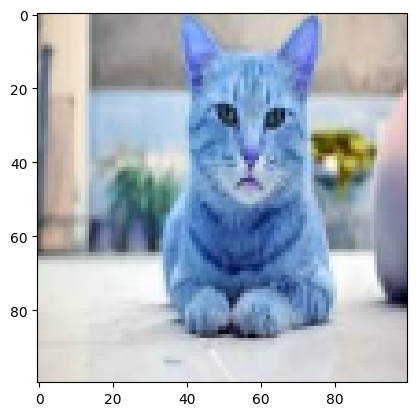

In [96]:
n= random.randint(0,len(test))

img = cv2.imread(test[n],1)
img = cv2.resize(img,(100,100))

# cv2.imshow("img",img)
# k= cv2.waitKey(0)

# if k == 27:
#     cv2.destroyAllWindows()

plt.imshow(img)

img_pixel = np.array(img)
# img_pixel = img_pixel/255
img_pixel= np.expand_dims(img_pixel,axis=0)

new_pred= model.predict(img_pixel) 
print(new_pred)
new_pred= new_pred > 0.5

if new_pred == 1:
    print("model prediction: CAT")
    
else:
    print("model prediction: DOG") 